<a href="https://colab.research.google.com/github/tanay47/Airbnb-Data-Analysis/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

### THIS IS A REALLY SIMPLE EDA ON AIRBNB DATASET WHICH WILL ANSWER BASIC QUERY USING VARIABLES OF THIS DATASET.

In [1]:
### FIRST THINGS, FIRST. WHICH WILL GET OUR BOAT GOING.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
### MOUNTING NOTEBOOK TO DRIVE.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
### READING OUR DATASET. ALSO CHECKING USING head() FUNCTION.

airbnb_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module 1/CS PROJECT 1 (EDA)/Copy of Airbnb NYC 2019.csv")
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
### EXTRACTING INFO FROM DATAFRAME USING info() finction.

airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
### GLANCING AT ALL COLUMNS OF DATASET, CHECKING FOR UNWANTED CATEGORIES/COLUMNS.

airbnb_df_columns = airbnb_df.columns
airbnb_df_columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
### DROPPING UNWANED COLUMNS 'latitude', 'longitude' TO HAVE A PRECISE DATASET.

airbnb_df = airbnb_df.drop(['latitude', 'longitude','last_review'], axis=1)

In [7]:
### TO HAVE A SENSIBLE DATA TO WORK WITH, WE WILL CHECK AND ELIMINATE DUPLICATE OBSERVATIONS/RECORDS.

dupli_rows_df = airbnb_df[airbnb_df.duplicated()]
print(f"No of duplicate record is", {dupli_rows_df.shape}) 

No of duplicate record is {(0, 13)}


GREAT, WE HAVE NO DUPLICATE RECORDS OR OBSERVATIONS. SO, MOVING AHED. 

### WE'LL ALSO HAVE TO TAKE CARE OF MISSING DATA, NULL VALUES.


In [8]:
### CHECK FOR MISSING DATA, NULL VALUES. ALSO REPLACING THEM WITH APPROPRIATE DATA.

airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

ANALYSING FROM ABOVE DATA, WE CAN ELEMINATE NULL OBSERVATIONS FROM COLUMNS ["names", "host_name"],  AS ELEMINATING THEM WILL NOT CAUSE ANY DISTURBING CHANGE IN DATA.

In [9]:
### ELEMINATING ALL NULL VALUES FROM COLUMNS  "name" AND "host_name".

airbnb_df.dropna(subset = ["name","host_name"], inplace=True)

In [10]:
### SUBSTITUTING "0" IN ALL "NAN" VALUES IN COLUMN "reviews_per_month".

airbnb_df.fillna(0,inplace=True)

### FILLING REMANING NAN VALUES.
airbnb_df.fillna(0)

### CONFIRMING IF ALL THE "NAN" VALUES ARE REPLACED.
airbnb_df.isna().sum()


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

GREAT, AT THIS POINT WE HAVE TAKEN CARE OF ALL "NAN" VALUES.

LASTLY WE SHOULD ALSO CHECK FOR OUTLIERS FOR RELEVENT COLUMNS.

In [11]:
### LETS LOOK AT OUR DATAFRAME AND LOOK FOR DISCRETE COLUMNS.

airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


In [12]:
airbnb_df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,152.740309,7.012444,23.273098,1.091124,7.148369,112.801425
std,1.098289e+07,7.862389e+07,240.232386,20.019757,44.549898,1.597270,32.964600,131.610962
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


ANALYSIING THE ABOVE TABLE SHOWS, MOST OF THE COLUMNS ARE WELL WITHIN ACCEPTABLE RANGE EXCEPT FOR "minimum_nights" COLUMN.

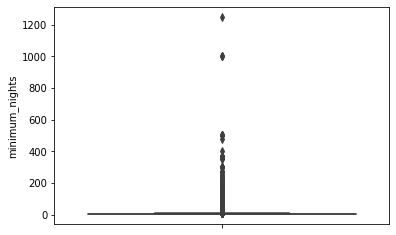

In [13]:
### PLOTTING OUTLIERS OF COLUMN "minimum_nights".

sns.boxplot(y=airbnb_df["minimum_nights"])

### ALRIGHT, WE ARE DONE WITH CLEANING OUR DATA. NOW OUR DATASET IS READY FOR ANALYSIS WITH BETTER ACCURACY THAN BEFORE.


let's start with basic analysis with every column we possibly can.

1. let's find which neighbourhood is really popullar.

In [14]:
### GROUPING ON "neighbourhood" COLUMN AND COUNTING THE OCCURANCE IN DATASET.

neighbourhood_count_df = airbnb_df.groupby("neighbourhood")["neighbourhood"].count().sort_values(ascending=False)[:3]
print(f"Most demanding or popular neighbourhood are \n {neighbourhood_count_df}")

Most demanding or popular neighbourhood are 
 neighbourhood
Williamsburg          3917
Bedford-Stuyvesant    3713
Harlem                2655
Name: neighbourhood, dtype: int64


So, we can see that "Williamsburg", "Bedford-stuyvesant", "Harlem" are most in demand neighbourhoods. 

Let's take a step ahed and plot it graphically on a bar graph.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


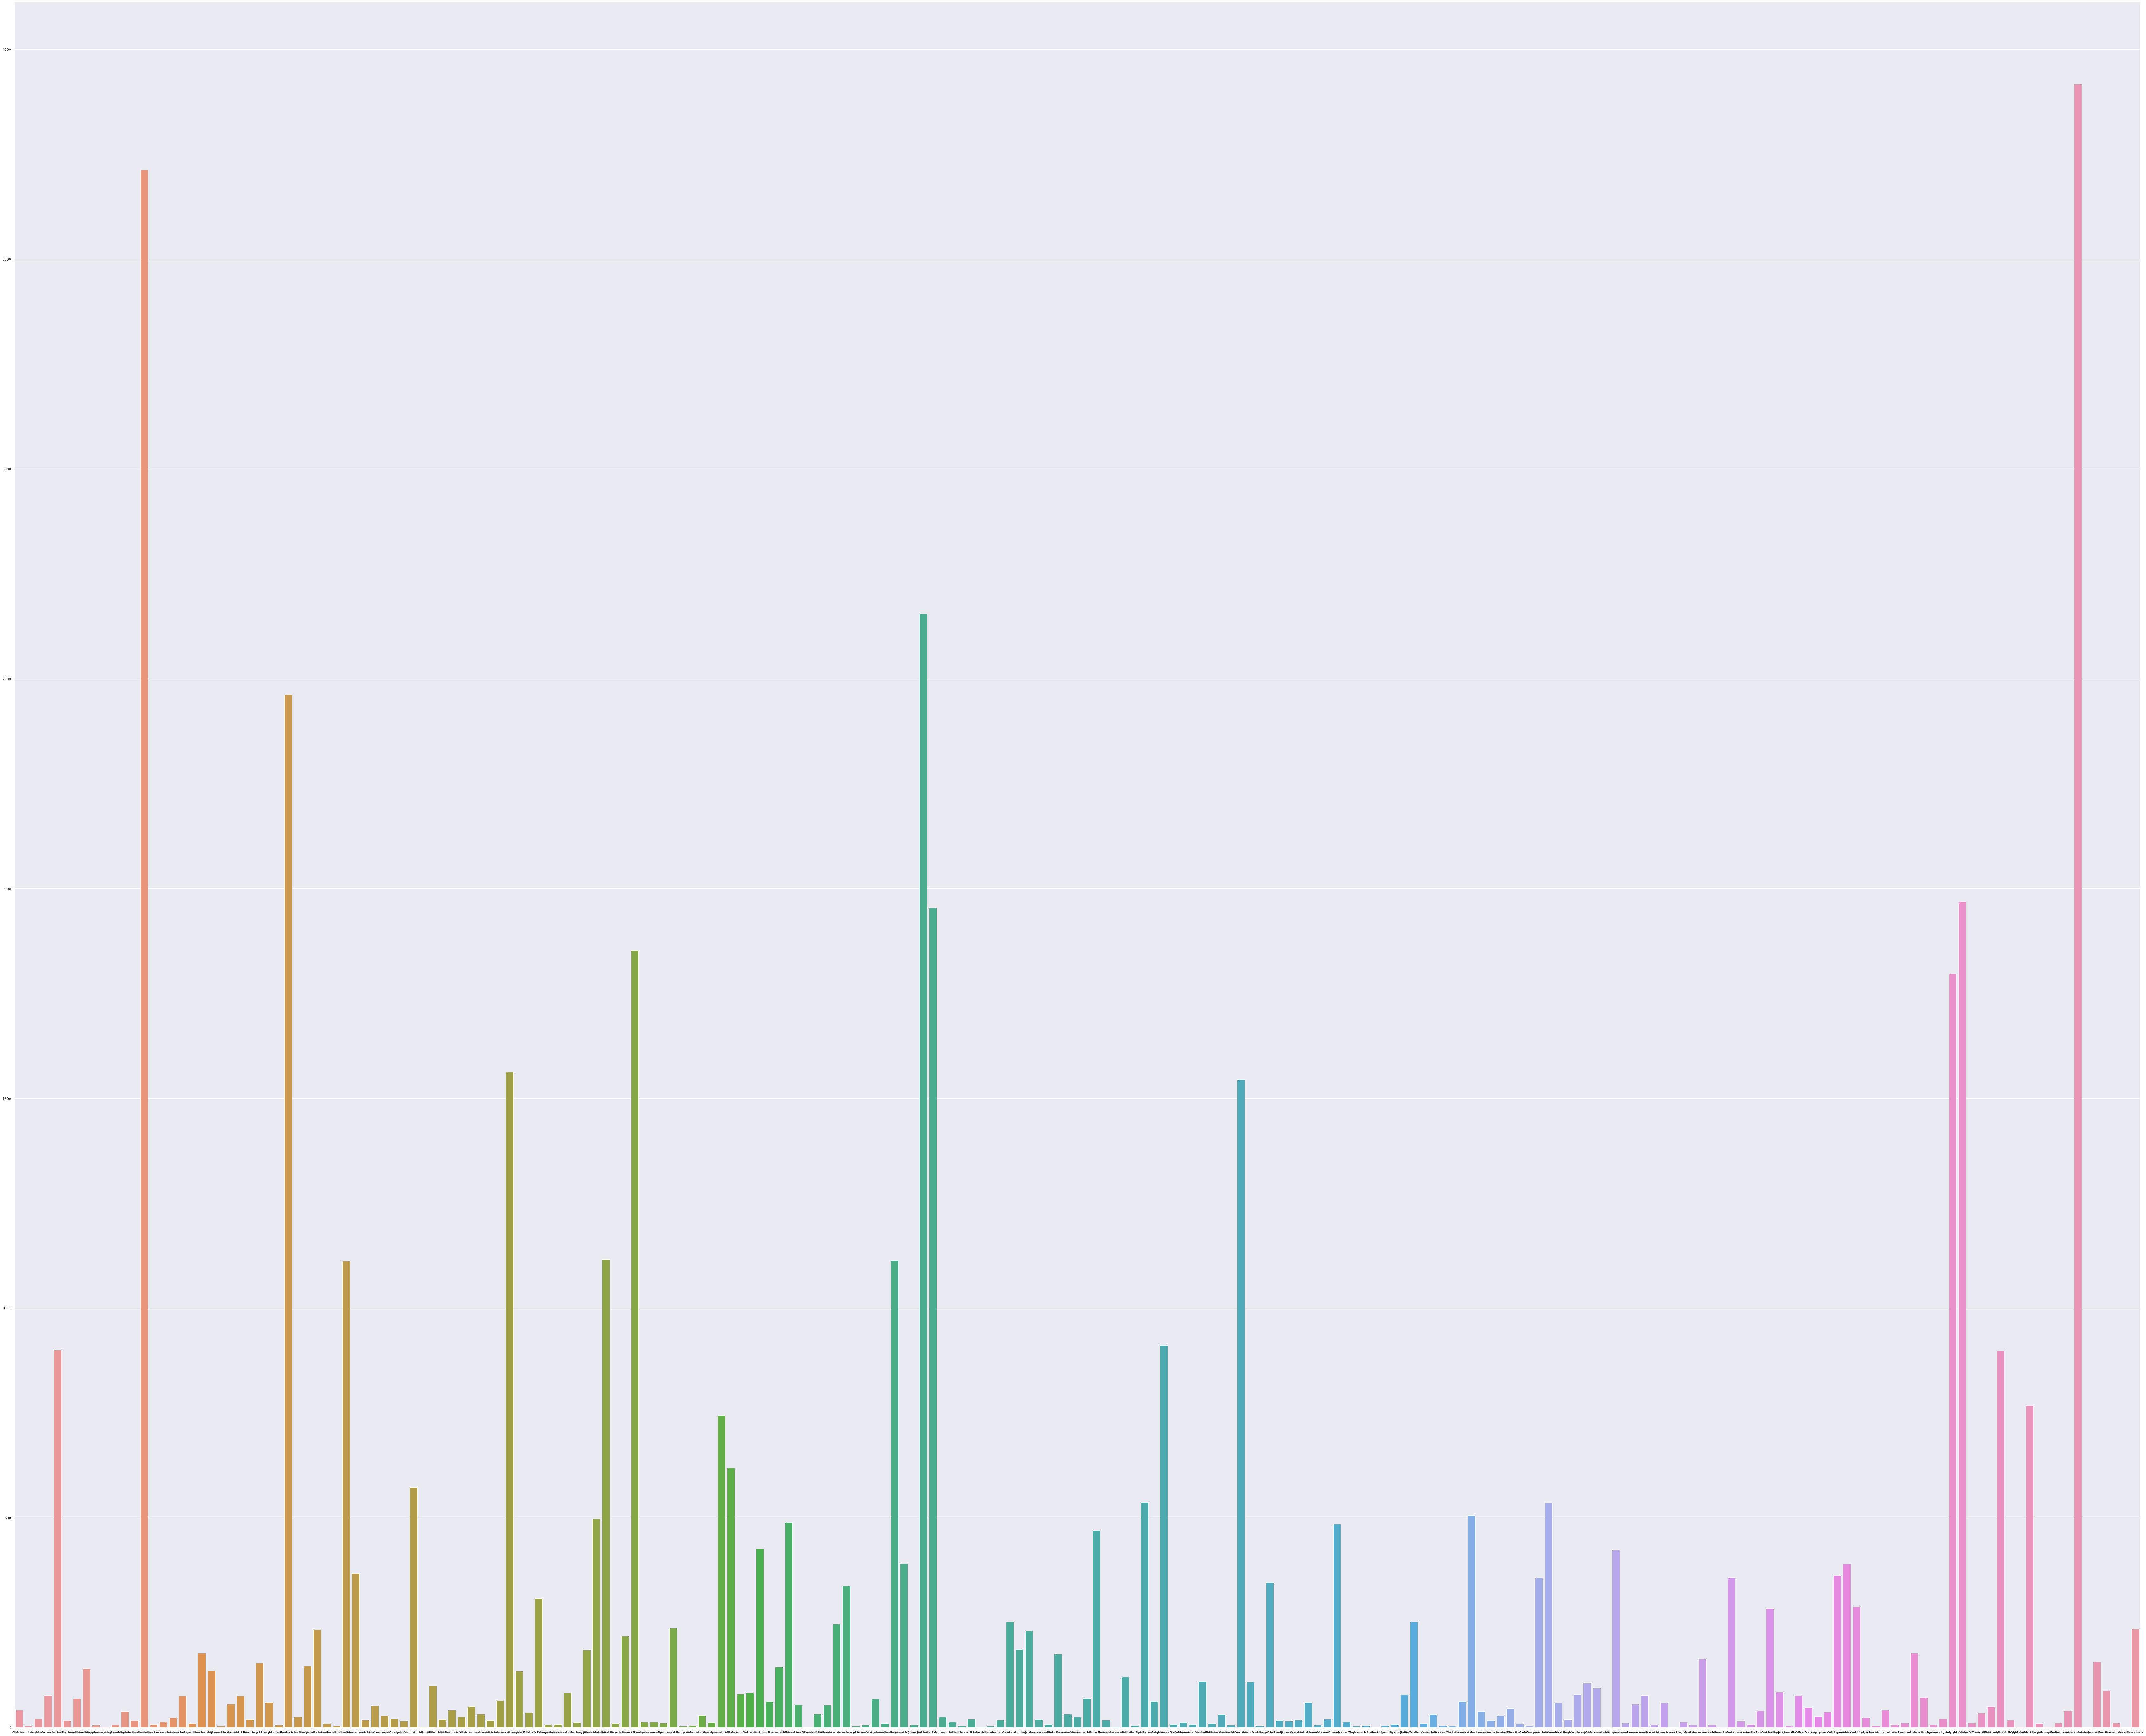

In [15]:
### PLOTTING THE ABOVE QUERY GRAPHICALLY USING "matplotlib".

sns.set(rc={'figure.figsize':(120,100)})
x,y = np.unique(airbnb_df['neighbourhood'],return_counts=True)
sns.barplot(x,y,)



In [16]:
airbnb_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355


let's find out, which room type was more prefered and which was least prefered.

In [17]:
### DIFFERENT TYPES OF "room_types"

airbnb_df["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)